In [1]:
import pandas as pd

df = pd.read_csv('Housing.csv', index_col=False)
df = df.sample(frac=1, ignore_index=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,6650000,6000,3,2,3,yes,yes,no,no,yes,0,no,furnished
1,3010000,4600,2,1,1,yes,no,no,no,no,0,no,furnished
2,5565000,4400,4,1,2,yes,no,no,no,yes,2,yes,semi-furnished
3,3290000,3792,4,1,2,yes,no,no,no,no,0,no,semi-furnished
4,6090000,8372,3,1,3,yes,no,no,no,yes,2,no,unfurnished


### EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
X = df.drop(columns=['price'], index=None)
y = df[['price']]

In [4]:
categorical_col = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus',]

In [5]:
for col in categorical_col:
    print(X[col].value_counts())
    print(X[col].isna().sum())

mainroad
yes    468
no      77
Name: count, dtype: int64
0
guestroom
no     448
yes     97
Name: count, dtype: int64
0
basement
no     354
yes    191
Name: count, dtype: int64
0
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
0
airconditioning
no     373
yes    172
Name: count, dtype: int64
0
prefarea
no     417
yes    128
Name: count, dtype: int64
0
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
0


### Categorical Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X_cat = X[['mainroad', 'guestroom', 'basement',
           'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
X_cat_encoded = encoder.fit_transform(X_cat)

In [7]:
X_cat.columns
len(X_cat_encoded), len(X_cat_encoded[0])

(545, 15)

In [8]:
X_cat_encoded = pd.DataFrame(
    X_cat_encoded, columns=encoder.get_feature_names_out(categorical_col))
X_cat_encoded.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


### Normalization

In [9]:
numerical_col = set(X.columns.to_list()) - set(categorical_col)
numerical_col

{'area', 'bathrooms', 'bedrooms', 'parking', 'stories'}

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_num = X[['area', 'bathrooms', 'bedrooms', 'parking', 'stories']]
X_scaled = scaler.fit_transform(X_num)
X_scaled

array([[0.29896907, 0.33333333, 0.4       , 0.        , 0.66666667],
       [0.20274914, 0.        , 0.2       , 0.        , 0.        ],
       [0.18900344, 0.        , 0.6       , 0.66666667, 0.33333333],
       ...,
       [0.25773196, 0.33333333, 0.6       , 0.66666667, 0.33333333],
       [0.15463918, 0.        , 0.4       , 0.        , 0.33333333],
       [0.09278351, 0.        , 0.6       , 0.        , 0.33333333]],
      shape=(545, 5))

In [11]:
scaler.feature_names_in_

array(['area', 'bathrooms', 'bedrooms', 'parking', 'stories'],
      dtype=object)

In [12]:
X_scaled = pd.DataFrame(X_scaled, columns=scaler.feature_names_in_)
X_scaled.head()

,area,bathrooms,bedrooms,parking,stories
0,0.298969,0.333333,0.4,0.000000,0.666667
1,0.202749,0.000000,0.2,0.000000,0.000000
2,0.189003,0.000000,0.6,0.666667,0.333333
3,0.147216,0.000000,0.6,0.000000,0.333333
4,0.461993,0.000000,0.4,0.666667,0.666667


In [13]:
X = pd.concat([X_cat_encoded, X_scaled], axis=1)

In [14]:
X.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bathrooms,bedrooms,parking,stories
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.298969,0.333333,0.4,0.000000,0.666667
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.202749,0.000000,0.2,0.000000,0.000000
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.189003,0.000000,0.6,0.666667,0.333333
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.147216,0.000000,0.6,0.000000,0.333333
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.461993,0.000000,0.4,0.666667,0.666667


### Train-Test Split

In [15]:
0.8 * len(X), 0.2 * len(X)

(436.0, 109.0)

In [16]:
X_train, X_test = X[:500], X[500:]
y_train, y_test = y[:500], y[500:]

### Training

In [17]:
X_train.shape

(500, 20)

In [18]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [19]:
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test = torch.tensor(X_test.to_numpy(), dtype = torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1,1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1,1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([500, 20]),
 torch.Size([45, 20]),
 torch.Size([500, 1]),
 torch.Size([45, 1]))

In [20]:
batch_size = 4
train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size)

In [96]:



class MLP(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features=input_size, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1),



        )

    def forward(self, x):
        return self.net(x)



In [97]:
model = MLP(input_size=X_train.shape[1])
eval_criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [98]:
model.parameters

<bound method Module.parameters of MLP(
  (net): Sequential(
    (0): Linear(in_features=20, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)>

In [99]:

epoch_loss = []
def train(model, num_epochs= 20,):
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = eval_criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        epoch_loss.append(loss.item())
    
def test():
    model.eval()
    with torch.no_grad():
        total_loss = 0
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            total_loss += eval_criterion(outputs, batch_y).item() * batch_X.size(0)
        average_loss = total_loss/len(test_set)
        print(f'\nTest Loss: {average_loss:.4f}')
         
    

In [100]:
epochs = 200
train(model=model, num_epochs=epochs)

Epoch [10/200], Loss: 19144724447232.0000
Epoch [20/200], Loss: 4429788479488.0000
Epoch [30/200], Loss: 1467834040320.0000
Epoch [40/200], Loss: 935787560960.0000
Epoch [50/200], Loss: 3031060185088.0000
Epoch [60/200], Loss: 1361604902912.0000
Epoch [70/200], Loss: 3795766214656.0000
Epoch [80/200], Loss: 215163633664.0000
Epoch [90/200], Loss: 1215044517888.0000
Epoch [100/200], Loss: 677657706496.0000
Epoch [110/200], Loss: 1903857631232.0000
Epoch [120/200], Loss: 1699013197824.0000
Epoch [130/200], Loss: 355387047936.0000
Epoch [140/200], Loss: 413289021440.0000
Epoch [150/200], Loss: 4918540763136.0000
Epoch [160/200], Loss: 1347771695104.0000
Epoch [170/200], Loss: 3063472455680.0000
Epoch [180/200], Loss: 586575249408.0000
Epoch [190/200], Loss: 4144386539520.0000
Epoch [200/200], Loss: 130595348480.0000


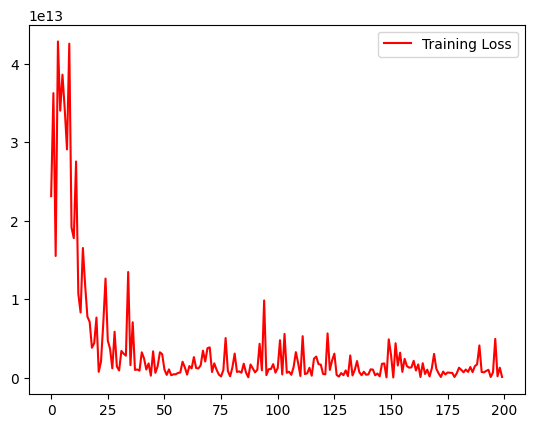

In [101]:
import matplotlib.pyplot as plt
x = [i for i in range(len(epoch_loss))]
y = epoch_loss
plt.plot(x,y,'r', label='Training Loss',)
plt.legend()
plt.show()

In [102]:


# Example prediction
sample_input = X_test[0:1]  # Take first test sample
predicted_price = model(sample_input)
print(f'\nSample Prediction:')
print(f'Predicted price: {predicted_price.item():.2f}')
print(f'Actual price: {y_test[0][0]}')


Sample Prediction:
Predicted price: 5462747.00
Actual price: 3773000.0


In [103]:


# Example prediction
sample_input = X_test[3:4]  # Take first test sample
predicted_price = model(sample_input)
print(f'\nSample Prediction:')
print(f'Predicted price: {predicted_price.item():.2f}')
print(f'Actual price: {y_test[3][0]}')


Sample Prediction:
Predicted price: 5995977.00
Actual price: 6083000.0


In [104]:
predictions = torch.Tensor(size=(y_test.shape))
for i in range(len(X_test)):

    predictions[i] = model(X_test[i])

In [105]:
(torch.abs(y_test - predictions)**2).mean()

tensor(7.4488e+11, grad_fn=<MeanBackward0>)

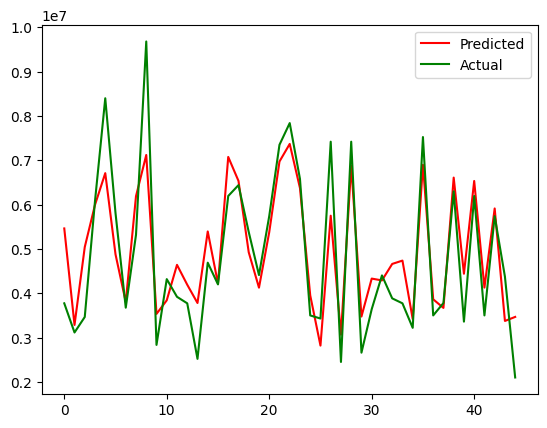

In [106]:
import matplotlib.pyplot as plt

x = [i for i in range(len(y_test))]
y1 = predictions.detach().tolist()
y2 = y_test.numpy().tolist()
y11 = [int(i[0]) for i in y1]
y22 = [int(i[0]) for i in y2]

plt.plot(x,y11,'r',label='Predicted')
plt.plot(x,y22,'g', label='Actual')
plt.legend()
plt.show()